In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-11-16 11:08:07--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-11-16 11:08:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-11-16 11:08:07--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
#Use the 300 dimensional GLove Word Embeddings
import numpy as np
import os

glove_dir = './'

embeddings_index = {} #initialize dictionary
f = open(os.path.join(glove_dir, 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
from gensim.test.utils import datapath, get_tmpfile         #code from https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1194/materials/Gensim%20word%20vector%20visualization.html
from gensim.models import KeyedVectors                      #changed to 300 and 50 dimenstional encodings
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = 'glove.6B.50d.txt'
word2vec_glove_file = get_tmpfile("glove.6B.50d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
def analogy(x1, x2, x3):  #format x1 - x2 + x3
    result = model.most_similar(positive=[x1, x3], negative=[x2])
    return result[0][0]

In [ ]:
def difference_of_l2norm(x1,x2,x3,word):
  l2word = np.linalg.norm(embeddings_index[word])  
  l2combo = np.linalg.norm(embeddings_index[x1] - embeddings_index[x2] + embeddings_index[x3])
  difference = abs(l2word - l2combo)
  return l2combo, l2word, difference


In [ ]:
analogy('prince', 'boy', 'girl')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'princess'

In [ ]:
difference_of_l2norm('prince', 'boy', 'girl','princess')

(7.830418, 7.2799983, 0.5504198)

In [ ]:
analogy('king','man','woman')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'queen'

In [ ]:
difference_of_l2norm('king','man','woman','queen')

(7.9847693, 6.931188, 1.0535812)

In [ ]:
analogy('chinese','china','india')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'indian'

In [ ]:
difference_of_l2norm('chinese','china','india','indian')

(7.833182, 7.292244, 0.5409379)

In [ ]:
analogy('larger','large','small')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'smaller'

In [ ]:
difference_of_l2norm('larger','large','small','smaller')

(6.40444, 5.9111733, 0.49326658)

In [ ]:
from keras import backend as K
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed
from keras.layers import Embedding, Activation, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=40000,
                                                      skip_top=0,
                                                      maxlen=500,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

In [ ]:
X_train =list(X_train)
y_train = list(y_train)

In [ ]:
for sent in X_test[:20000]:
  X_train.append(sent)
for i in y_test[:20000]:
  y_train.append(i)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
len(X_train)

42882

In [ ]:
X_test = X_test[20000:]
y_test = y_test[20000:]

In [ ]:
len(X_test)

3065

In [ ]:
max_length = 500
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [ ]:
embedding_dimension = 300
model = Sequential() # without GloVe embeddings
model.add(InputLayer(input_shape=(max_length, )))
model.add(Embedding(input_dim=40000, output_dim=embedding_dimension, input_length=max_length))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 300)          12000000  
_________________________________________________________________
lstm_8 (LSTM)                (None, 16)                20288     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 12,020,305
Trainable params: 12,020,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
word2index = imdb.get_word_index()
    
word2index = {k:v+3 for k,v in word2index.items()}
word2index["<PAD>"] = 0
word2index["<START>"] = 1
word2index["<UNK>"] = 2



In [ ]:
embedding_dim = 300

embedding_matrix = np.zeros((len(word2index), embedding_dim))
for word, i in word2index.items():
  embedding_vector = embeddings_index.get(word)
  if i < len(word2index):
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
model = Sequential() #with GloVe embeddings
model.add(InputLayer(input_shape=(max_length, )))
model.add(Embedding(len(word2index), 300, weights=[embedding_matrix],input_length = max_length,trainable=False))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 300)          26576100  
_________________________________________________________________
lstm_12 (LSTM)               (None, 16)                20288     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 26,596,405
Trainable params: 20,305
Non-trainable params: 26,576,100
_________________________________________________________________


In [ ]:
model = Sequential() #BILSTM
model.add(InputLayer(input_shape=(max_length, )))
model.add(Embedding(len(word2index), 300, weights=[embedding_matrix],input_length = max_length,trainable=False))
model.add(Bidirectional(LSTM(16, return_sequences=False)))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 300)          26576100  
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                40576     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 26,616,709
Trainable params: 40,609
Non-trainable params: 26,576,100
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=128,
                          epochs=15, verbose=2,
                          validation_split=0.2)

Epoch 1/15
269/269 - 17s - loss: 0.2184 - accuracy: 0.9141 - val_loss: 0.2555 - val_accuracy: 0.8947
Epoch 2/15
269/269 - 17s - loss: 0.2127 - accuracy: 0.9146 - val_loss: 0.2562 - val_accuracy: 0.8968
Epoch 3/15
269/269 - 17s - loss: 0.2070 - accuracy: 0.9198 - val_loss: 0.2570 - val_accuracy: 0.8912
Epoch 4/15
269/269 - 17s - loss: 0.1997 - accuracy: 0.9221 - val_loss: 0.2609 - val_accuracy: 0.8917
Epoch 5/15
269/269 - 17s - loss: 0.1931 - accuracy: 0.9252 - val_loss: 0.2534 - val_accuracy: 0.8965
Epoch 6/15
269/269 - 17s - loss: 0.1856 - accuracy: 0.9287 - val_loss: 0.2614 - val_accuracy: 0.8968
Epoch 7/15
269/269 - 17s - loss: 0.1798 - accuracy: 0.9315 - val_loss: 0.2516 - val_accuracy: 0.8971
Epoch 8/15
269/269 - 17s - loss: 0.1734 - accuracy: 0.9346 - val_loss: 0.2560 - val_accuracy: 0.8953
Epoch 9/15
269/269 - 17s - loss: 0.1702 - accuracy: 0.9340 - val_loss: 0.2522 - val_accuracy: 0.8966
Epoch 10/15
269/269 - 17s - loss: 0.1662 - accuracy: 0.9365 - val_loss: 0.2639 - val_accura

In [ ]:
model.evaluate(X_test, y_test)

96/96 [==============================] - 2s 22ms/step - loss: 0.2917 - accuracy: 0.8923


[0.29165011644363403, 0.8923327922821045]

In [ ]:
import matplotlib.pyplot as plt
def display_plot(history,train,validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title('Train/Validation accuracy Vs No. of epochs')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

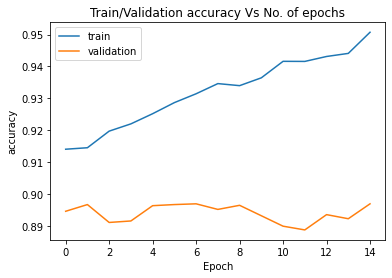

In [ ]:
display_plot(history,'accuracy','val_accuracy')

In [ ]:
def prediction_engine(text):
  my_list = text.split()
  input_list = []

  for word in my_list:
    try:
      input_list.append(word2index[word.lower()])
    except KeyError:
      input_list.append(word2index["<UNK>"])
  
  input_list.insert(0, 1)
  input_list = np.array(input_list)

  sample = np.pad(input_list, (max_length - len(input_list),0),'constant')
  sample = np.reshape(sample, (1, max_length))

  output = model.predict_classes(sample)
  
  return output[0][0]

In [ ]:
# movie reviews for 10 movies has been added manually

movie_reviews = [['The Prestige', 'Christopher Nolan movie is a smart, intriguing tale of deceit and obsession', 1], 
                 ['Sixth Sense', 'This is one of the rarest of movie treats, a thinking person thriller that is genuinely haunting. You are lucky if you see a movie that you are still thinking about it hours later', 1],
                 ['The Imitation Game', 'Its an impeccable thriller , taut and brilliant , exploring the horrors of war along with the choices that doom mankind for all eternity', 1],
                 ['The Man who knew infinity', 'This film centers on Srinivasa Ramanujan, a brilliant mathematician from India, and his unlikely friendship with the Cambridge professor G.H. Hardy. Brown also tries to give the story an emotional touch, to good effect. And in fact, it is this which makes this film both enjoyable and gripping', 1],
                 ['The Fault in our Stars', 'If you like feel-good, escapist films, this one is not for you. The Fault in Our Stars is one of the most unpretentious tragic love stories told in a heart-warming manner', 1], 
                 ['The Greatest Showman', 'The beauty of The Greatest Showman is not limited to its visual appeal – spectacular sets, acrobatic performances, dances and singing ability of its artistes, headlined by the immensely talented Hugh Jackman, who exudes Barnum’s indomitable spirit. What stands the film apart is its relevance to today’s times. It touches upon social issues like class discrimination or aversion towards human abnormalities that continue to plague our society even today.', 1],
                 ['The Babysitter','Filling a movie with horror archetypes (narcissistic cheerleader, psychotic jock, sassy comedic foil) is not necessarily a bad thing, but this is a movie that at times feels woefully archaic',0],
                 ['Extraction', 'Extraction encourages linguistic diversity but fails to dig deeper into character development', 0],
                 ['Man on Fire', r'Two of today\'s most talented and charismatic screen performers are lost in an over-big, over-loud, over-heated, over-long, over-everything mess of a story about revenge', 0],
                  ['The Perks of being a Wallflower','I get why a lot of people love this movie but the book is so much better. It\'s a good movie, but I think it\'s role as an adaptation is a little eh. The characters and story are so much more real in the book. It feels numb all the way through and when there\'s a happy part of the story the author really makes it memorable. In the movie the characters just seem quirky and bigger than life because they listen to David Bowie', 0]]

In [ ]:
test = []
prediction = []
predictionMap = {0:'negative', 1:'positive'}
for x, y, z in movie_reviews:
  pred = prediction_engine(y)
  prediction.append(pred)
  test.append(z)
  print('The review for the movie \''+x+ '\' seems ' + predictionMap[pred])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The review for the movie 'The Prestige' seems positive
The review for the movie 'Sixth Sense' seems positive
The review for the movie 'The Imitation Game' seems positive
The review for the movie 'The Man who knew infinity' seems positive
The review for the movie 'The Fault in our Stars' seems positive
The review for the movie 'The Greatest Showman' seems positive
The review for the movie 'The Babysitter' seems negative
The review for the movie 'Extraction' seems negative
The review for the movie 'Man on Fire' seems negative
The review for the movie 'The Perks of being a Wallflower' seems positive


In [ ]:
# confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

cm = metrics.confusion_matrix(test, prediction)

print(cm)

[[3 1]
 [0 6]]


In [ ]:
from sklearn.metrics import accuracy_score
print('The accuracy on the testing dataset is ' + str(accuracy_score(test,prediction)))


The accuracy on the testing dataset is 0.9


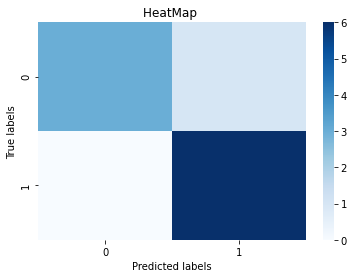

In [ ]:
import seaborn as sns


sns.heatmap(cm, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title('HeatMap ')
plt.show()